# Access web table by BeautifulSoup

In [1]:
import requests # access the web page
from bs4 import BeautifulSoup # to parse html and navigate html tree

In [2]:
# use requests package to access the web page
urlString='https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield'
page = requests.get(urlString)
print(type(page))
print(page)

<class 'requests.models.Response'>
<Response [200]>


In [3]:
# use Beautiful Soup to parse the html from the web page
soup = BeautifulSoup(page.content)
print(type(soup))
print(soup.title)

<class 'bs4.BeautifulSoup'>
<title>
	
	 Daily Treasury Yield Curve Rates 
    

</title>


In [4]:
# There are alternative to locating the table within the HTML
table_chart = soup.find(class_="table-chart")
print(t_chart.prettify())
#table = main_content.select_one("table:nth-of-type(1)")
#table_body = t_chart.find("tbody")
#print(table_body)

<table class="t-chart" xmlns:a="http://www.w3.org/2005/Atom" xmlns:d="http://schemas.microsoft.com/ado/2007/08/dataservices" xmlns:fmt="urn:treasury-xslt-fmt" xmlns:m="http://schemas.microsoft.com/ado/2007/08/dataservices/metadata" xmlns:msxml="urn:schemas-microsoft-com:xslt">
 <tr>
  <th scope="col">
   Date
  </th>
  <th scope="col">
   1 mo
  </th>
  <th scope="col">
   2 mo
  </th>
  <th scope="col">
   3 mo
  </th>
  <th scope="col">
   6 mo
  </th>
  <th scope="col">
   1 yr
  </th>
  <th scope="col">
   2 yr
  </th>
  <th scope="col">
   3 yr
  </th>
  <th scope="col">
   5 yr
  </th>
  <th scope="col">
   7 yr
  </th>
  <th scope="col">
   10 yr
  </th>
  <th scope="col">
   20 yr
  </th>
  <th scope="col">
   30 yr
  </th>
 </tr>
 <tr class="oddrow">
  <td class="text_view_data" scope="row">
   02/03/20
  </td>
  <td class="text_view_data">
   1.56
  </td>
  <td class="text_view_data">
   1.57
  </td>
  <td class="text_view_data">
   1.57
  </td>
  <td class="text_view_data">


In [16]:
# Build parallel lists corresponding to the data in the page
# Note, assumes particular layout of table (maturities)
col0 = []
col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []
col7 = []
col8 = []
col9 = []
col10 = []
col11 = []
col12 = []
#tableBody = first_table.find('tbody')
tableRows = t_chart.find_all('tr') # within the found node, find all the <tr> (rows)
for row in tableRows:
    cells = row.findAll('td') # within the row, find each <td> (cell)
    if (len(cells) > 0):
       cell0 = cells[0].text.strip()
       col0.append(cell0)
        
       cell1 = cells[1].text.strip()
       col1.append(cell1)
        
       cell2 = cells[2].text.strip()
       col2.append(cell2)
        
       cell3 = cells[3].text.strip()
       col3.append(cell3)
        
       cell4 = cells[4].text.strip()
       col4.append(cell4)
        
       cell5 = cells[5].text.strip()
       col5.append(cell5)
        
       cell6 = cells[6].text.strip()
       col6.append(cell6)
        
       cell7 = cells[7].text.strip()
       col7.append(cell7)
        
       cell8 = cells[8].text.strip()
       col8.append(cell8)
        
       cell9 = cells[9].text.strip()
       col9.append(cell9)
    
       cell10 = cells[10].text.strip()
       col10.append(cell10)
        
       cell11 = cells[11].text.strip()
       col11.append(cell11)
        
       cell12 = cells[12].text.strip()
       col12.append(cell12)

       print(cell0, cell1, cell2, cell3, cell4, cell5, cell6, cell7, cell8, cell9, cell10, cell11, cell12, sep="|")


02/03/20|1.56|1.57|1.57|1.56|1.46|1.36|1.34|1.35|1.45|1.54|1.84|2.01
02/04/20|1.55|1.57|1.57|1.57|1.48|1.41|1.40|1.42|1.52|1.61|1.91|2.08
02/05/20|1.55|1.56|1.57|1.57|1.49|1.44|1.43|1.46|1.57|1.66|1.97|2.14
02/06/20|1.59|1.59|1.57|1.58|1.51|1.44|1.43|1.45|1.56|1.65|1.94|2.11
02/07/20|1.57|1.58|1.56|1.57|1.49|1.41|1.39|1.41|1.51|1.59|1.89|2.05
02/10/20|1.58|1.58|1.58|1.58|1.45|1.37|1.36|1.38|1.47|1.56|1.87|2.03


In [17]:
# from the parallel lists above, create a DataFrame using a dictionary
import pandas as pd
df = pd.DataFrame({
                   "1mo":col1,
                   "2mo":col2,
                   "3mo":col3,
                   "6mo":col4,
                   "1yr":col5,
                   "2yr":col6,
                   "3yr":col7,
                   "5yr":col8,
                   "7yr":col9,
                   "10yr":col10,
                   "20yr":col11,
                   "30yr":col12
                  },
                  index=col0
                  )
df

,1mo,2mo,3mo,6mo,1yr,2yr,3yr,5yr,7yr,10yr,20yr,30yr
02/03/20,1.56,1.57,1.57,1.56,1.46,1.36,1.34,1.35,1.45,1.54,1.84,2.01
02/04/20,1.55,1.57,1.57,1.57,1.48,1.41,1.40,1.42,1.52,1.61,1.91,2.08
02/05/20,1.55,1.56,1.57,1.57,1.49,1.44,1.43,1.46,1.57,1.66,1.97,2.14
02/06/20,1.59,1.59,1.57,1.58,1.51,1.44,1.43,1.45,1.56,1.65,1.94,2.11
02/07/20,1.57,1.58,1.56,1.57,1.49,1.41,1.39,1.41,1.51,1.59,1.89,2.05
02/10/20,1.58,1.58,1.58,1.58,1.45,1.37,1.36,1.38,1.47,1.56,1.87,2.03


In [30]:
import numpy as np
row_data=np.array(df)
row_1=row_data.tolist()
r1= row_1[0]
r1
#print(len(r1))

12


In [31]:
float_r1 = []
for i in range(len(r1)):
    temp = float(r1[i])
    float_r1.append(temp)
print(float_r1)    

[1.56, 1.57, 1.57, 1.56, 1.46, 1.36, 1.34, 1.35, 1.45, 1.54, 1.84, 2.01]


In [26]:
import numpy as np
row_data=np.array(df)
row_1=row_data.tolist()
rlatest= row_1[-1]
rlatest

['1.58',
 '1.58',
 '1.58',
 '1.58',
 '1.45',
 '1.37',
 '1.36',
 '1.38',
 '1.47',
 '1.56',
 '1.87',
 '2.03']

In [35]:
float_rlatest = []
for i in range(len(rlatest)):
    temp = float(rlatest[i])
    float_rlatest.append(temp)
print(float_rlatest)

[1.58, 1.58, 1.58, 1.58, 1.45, 1.37, 1.36, 1.38, 1.47, 1.56, 1.87, 2.03]


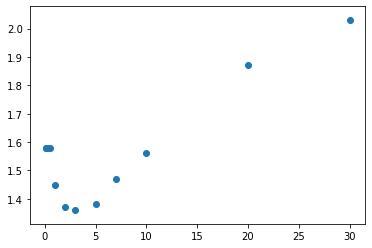

In [37]:
import matplotlib.pyplot as plt
years=[1/12,2/12,3/12,6/12,1,2,3,5,7,10,20,30]
yields=float_rlatest
plt.scatter(years,yields)
plt.show()